## Principal Component Analysis of genotype-phenotype map

In [1]:
# Initial imports for the notebook. 
%matplotlib inline
import matplotlib.pyplot as plt
from epistasis.artificial import ArtificialMap
from epistasis.plotting import epistasis_bar

## Protein Lattice Models

Protein lattice models provide us with a sequence space that exhibits similar, yet basic, behavior of protein sequence space.

Initial imports.

In [2]:
from latticeproteins.conformations import *
from latticeproteins.fitness import Fitness
from latticegpm.space import LatticeSequenceSpace
from latticegpm.utils import *

Build lattice model sequence space

In [80]:
# Build conformations
length = 7
database_dir = "%s/database" % os.getcwd()
c = Conformations(length, database_dir)

# Create a ligand
ligand = 'IIIIII'
ligandconf = 'LUUUR'
stabcutoff = 0
Ligand = (ligand, ligandconf, stabcutoff)
T = .9
fitness = Fitness(T, c, dGdependence='negstability', targets=None, ligand=Ligand)

# Build sequence space
wildtype, mutant = search_fitness_landscape(fitness, 100000)
ss = LatticeSequenceSpace(wildtype, mutant, fitness)
genotypes = ss.sequences
phenotypes =  ss.stabilities

## Principal component analysis

In [82]:
from epistasis.pca import EpistasisPCA

Create an epistasis PCA instance. 

In [83]:
pca = EpistasisPCA(wildtype, genotypes, phenotypes, 1)

Estimate the components of maximum variance. Plot the ratio of the variance explained by $n$ components.

[1, 7, 0, 1.0]

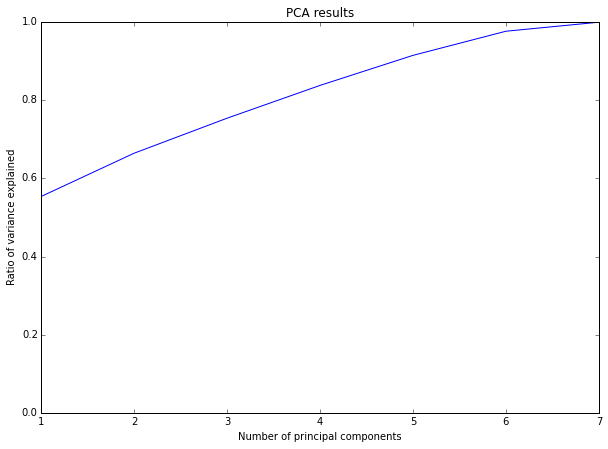

In [88]:
fig, ax = plt.subplots(1,1, figsize=[10,7])
explained_variance, new_x = pca.estimate_components()
component_index = range(1,len(explained_variance)+1)
variance_sum = [sum(explained_variance[:i]) for i in component_index]
ax.plot(component_index, variance_sum, 'b-')
ax.set_xlabel("Number of principal components")
ax.set_ylabel("Ratio of variance explained")
ax.set_title("PCA results")
ax.axis([1,len(variance_sum), 0, 1.0])

In [85]:
n_components = 3
print("First " + str(n_components) + " components account " + str(int(sum(pca.explained_variance_ratio[0:n_components])*100)) + "% of data.")
print(pca.explained_variance_ratio)

First 3 components account 75% of data.
[ 0.55360791  0.11081042  0.08969103  0.08399192  0.07697895  0.06182675
  0.02309302]


Plot the first two components of maximum variation from PCA.

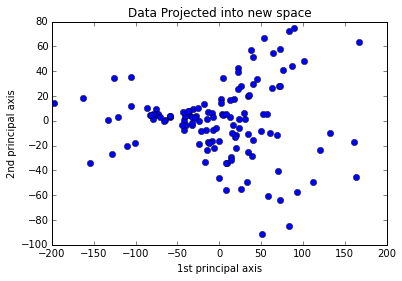

In [86]:
plt.plot(new_x[:,0], new_x[:,1], 'o')
plt.title("Data Projected into new space")
plt.xlabel("1st principal axis")
plt.ylabel("2nd principal axis")

Add the third dimension of maximum variation from PCA

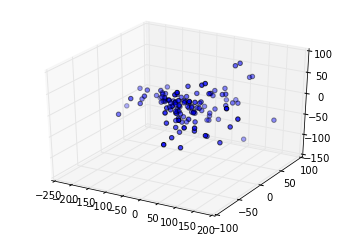

In [87]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
xs = new_x[:,0]
ys = new_x[:,1]
zs = new_x[:,2]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)

## Spectral Clustering of PCA

Some sort of spatial clustering can be used to identify trends/organization in this space. We use scikit-learn's spectral clustering here to quickly assign class labels to the phenotypes. This isn't meant to be a rigorous clustering search, just a crude way to separate the obvious clusters.

In [62]:
from sklearn.cluster import SpectralClustering

In [63]:
clusters = SpectralClustering(2)
labels = clusters.fit_predict(new_x[:,0:2])
print(labels)

[0 1 0 1 0 1 1 0 0 1 0 1 0 1 1]


Plot the clustered data from the first two components from PCA.

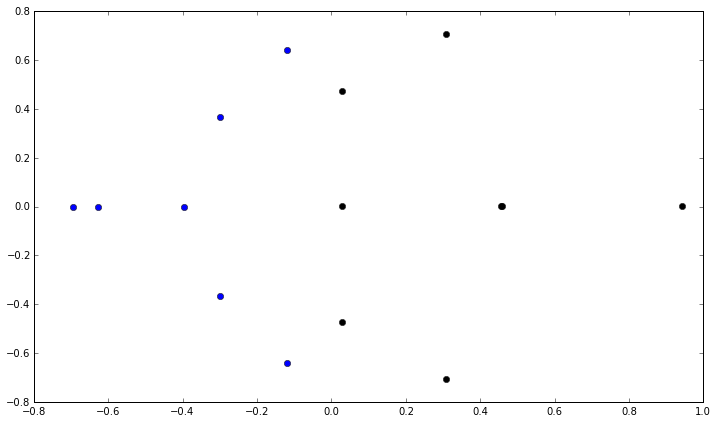

In [64]:
plt.figure(figsize=[12,7])
colors = ['b', 'k', 'g', 'r']
for i in range(len(new_x[:,0])):
    plt.plot(new_x[i,0], new_x[i,1], 'o'+colors[labels[i]])

In [51]:
# Print one genotypes-phenotypes of one of the colors
for i in range(len(new_x[:,1])):
    if colors[labels[i]] == 'b':
        print genotypes[i], phenotypes[i]

YWSWFEQCP -0.875259919008
YWSWFEQVP -0.831154902062
YWSWFEMCQ 0.410421456814
YWSWFEMCP 0.629440009104
YWSWFEMVQ 0.369785926733
YWSWFMQVP -2.09438161709
YWSWFMMCQ 0.158416331315
YWSWFMMCP -0.302247652304
YWSWFMMVP -0.350558544583
YWSWVEQCQ 0.131835448008
YWSWVEQCP -0.0394601429763
YWSWVEQVQ 0.00877940948903
YWSWVEQVP -0.186360864206
YWSWVEMCQ -0.337354356704
YWSWVEMCP -0.200644295597
YWSWVEMVQ -0.346144102065
YWSWVMMVP -1.67823093262
YWSGFEQCQ 0.579195194448
YWSGFEQCP 0.558276725574
YWSGFEQVQ 0.527013463952
YWSGFEQVP 0.628845612998
YWSGFEMCQ 0.963895094619
YWSGFEMCP 1.06453794219
YWSGFEMVQ 0.964048719486
YWSGFMQVP -0.755267295908
YWSGFMMCQ 0.125979768662
YWSGFMMCP 0.465590236549
YWSGFMMVQ 0.147884838555
YWSGFMMVP 0.480070992188
YWSGVEQCQ 0.936170675113
YWSGVEQCP 0.92972629535
YWSGVEQVQ 0.767624802962
YWSGVEQVP 0.874979575541
YWSGVEMCQ 0.946862186363
YWSGVEMCP 0.936263550092
YWSGVEMVQ 0.99058281629
YWSGVEMVP 0.981755354834
YWSGVMQCQ -0.0011337923215
YWSGVMQCP 0.167242159138
YWSGVMQVQ -0.